In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import nltk
import re

In [3]:
# Read data from files
data_t = pd.read_excel('test.xlsx')
data_p = pd.read_csv('test.csv')

In [6]:
data_t.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [5]:
# Find the dimensions of the datasets
data_t.shape

(264836, 8)

In [7]:
# FInd datatypes in datasets
data_t.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [8]:

# change the date datatype to display the correct format of dates
def convertdate(x):
 serial = x
 seconds = (serial - 25569) * 86400.0
 return datetime.datetime.utcfromtimestamp(seconds)

data_t['DATE'] = data_t['DATE'].apply(lambda x:convertdate(x))

data_t.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [9]:

# Check for null values
data_t.isnull().sum()
     

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
# Check for number of unique values
data_t.nunique()
     

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [11]:
data_t['TXN_ID'].nunique()

263127

In [12]:
data_t['PROD_QTY'].unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

In [13]:
data_t[data_t['PROD_QTY'] == 200].shape

(2, 8)

In [14]:
data_t[data_t['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [15]:
data_t[data_t['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [16]:
data_t.drop(data_t.loc[data_t['LYLTY_CARD_NBR']==226000].index, inplace=True)
data_t.shape

(264834, 8)

In [17]:
data_t['DATE'].nunique(), data_t['DATE'].min(), data_t['DATE'].max()
     

(364, Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

In [18]:
df = pd.DataFrame({'DATE':pd.date_range('2018-07-01', '2019-06-30')}) 
df.head()
     

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


In [19]:
# Merge df with data_t on DATE and check for the row with missing data
data_temp = pd.merge(data_t, df, on='DATE', how='outer')
null_data = data_temp[data_temp.isnull().any(axis=1)]
null_data
     

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264834,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Create a new dataframe which contains the total sale for each date

a = pd.pivot_table(data_t, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()
     

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [21]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)
     

365

In [22]:
c = a + b
c.fillna(0, inplace = True)
c.head()
     

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [23]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head()
     

,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


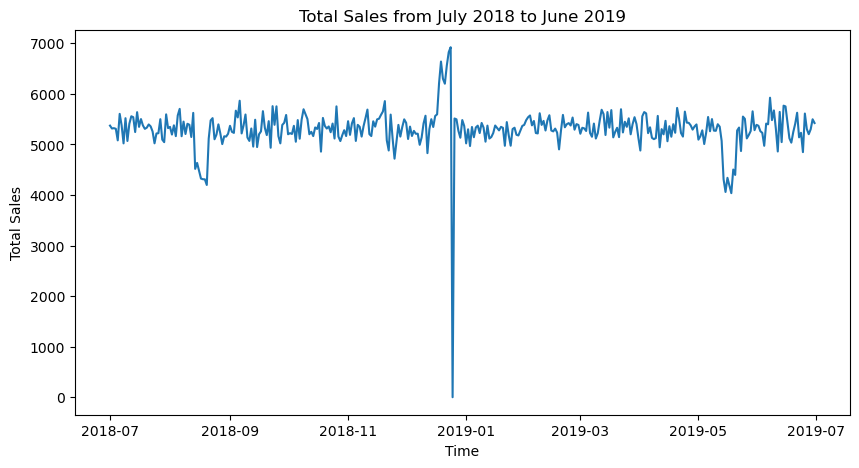

In [24]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [25]:
# Confirm the date where sales count equals to zero
c[c['Total Sales'] == 0]

,Total Sales
Date,
2018-12-25,0.0


In [26]:
# Let's look at the December month only
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,Total Sales
Date,
2018-12-01,5427.6
2018-12-02,5108.2
2018-12-03,5353.3
2018-12-04,5167.3
2018-12-05,5268.0


Text(0.5, 1.0, 'Total Sales in December')

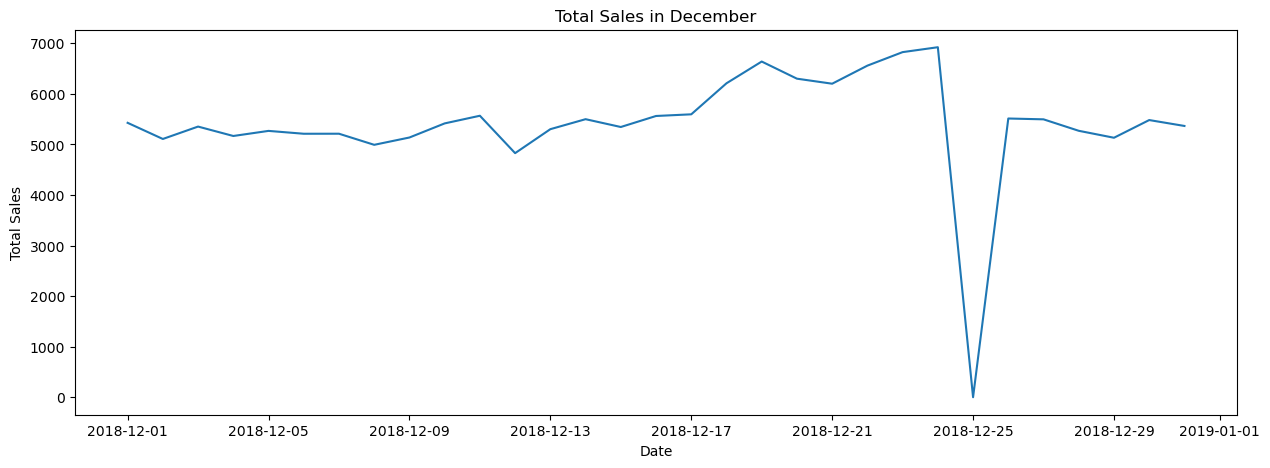

In [27]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

In [28]:

# Create pack size column
search = []    
for values in data_t['PROD_NAME']:
    search.append(re.search(r'\d+', values).group())

data_t['Pack-size'] = search
data_t['Pack-size'] = pd.to_numeric(data_t['Pack-size'])

data_t.head()
     

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [29]:
# Check for the minimum and maximum packet sizes
print('Minimum pack size:' + str(data_t['Pack-size'].min())), print('Maximum pack size:' + str(data_t['Pack-size'].max()))
     

Minimum pack size:70
Maximum pack size:380


(None, None)

Text(0.5, 1.0, 'Transactions based on Pack-size')

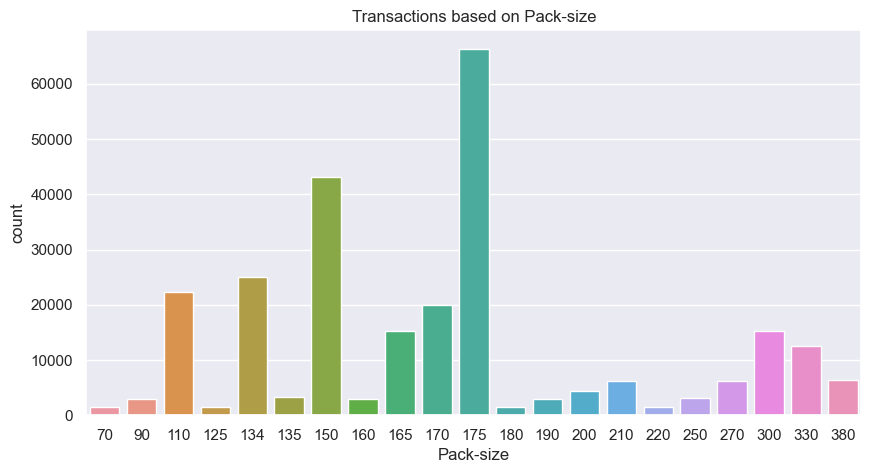

In [30]:
# Plot transactions based on Pack-size
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x="Pack-size", data=data_t)
plt.title('Transactions based on Pack-size')
     

In [31]:

# Create new column Brand
data_t['Brand'] = data_t['PROD_NAME'].str.partition(' ')[0]
data_t.head()
     

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [32]:
# Check unique values for Brand
data_t['Brand'].unique()
     

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [33]:
di = {'Dorito':'Doritos', 'Infzns':'Infuzions', 'Smith':'Smiths', 'GrnWves':'Grain', 'WW':'Woolworths', 'RRD':'Red', 'Snbts':'Sunbites', 'NCC':'Natural'}
data_t.replace({"Brand": di}, inplace=True)
data_t['Brand'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [34]:
# Display sample data from purchase behaviour data
data_p.head(3)
     

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [35]:
data_p.shape

(72637, 3)

In [36]:
# Check for null values
data_p.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [37]:
# Number of unique values in dataset
data_p.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [39]:
data_p['LIFESTAGE'].unique(), data_p['PREMIUM_CUSTOMER'].unique()

(array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
        'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
        'RETIREES'], dtype=object),
 array(['Premium', 'Mainstream', 'Budget'], dtype=object))

Text(0.5, 1.0, 'Number of customers in each LIFESTAGEs')

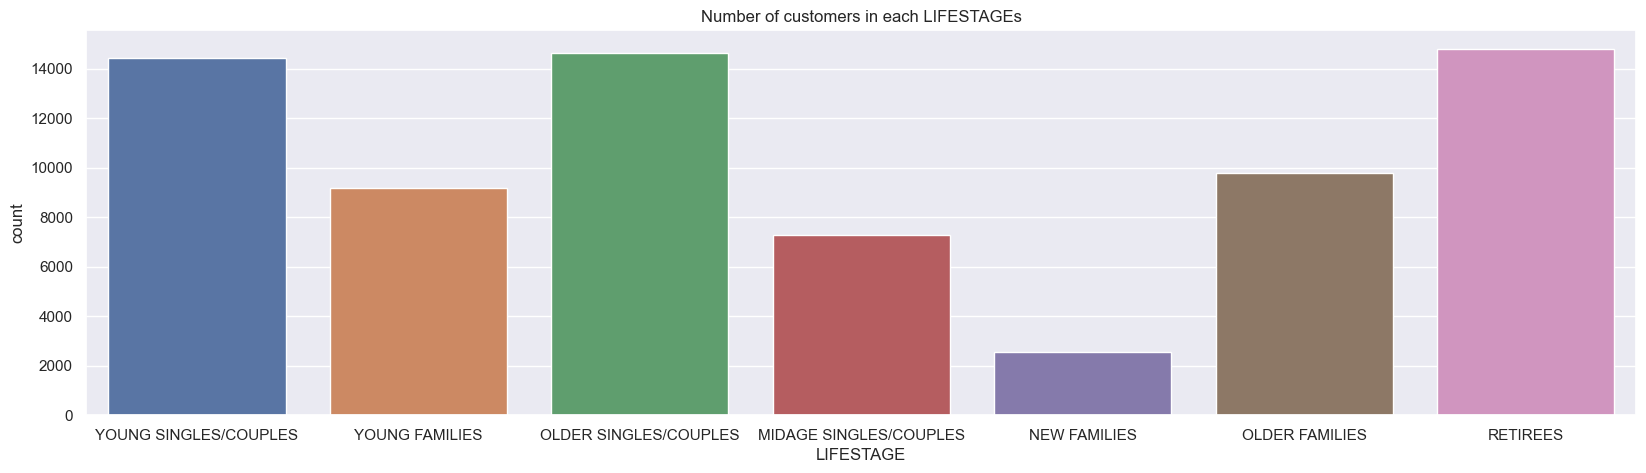

In [40]:
# Countplot on Lifestage and Premium_Customer
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
sns.countplot(x="LIFESTAGE", data=data_p, dodge=False)
plt.title('Number of customers in each LIFESTAGEs')
     

Text(0.5, 1.0, 'Number of customers in each PREMIUM types')

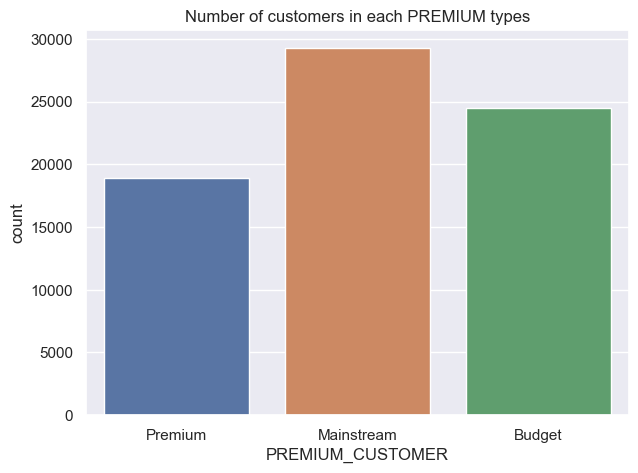

In [41]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7,5))
sns.countplot(x="PREMIUM_CUSTOMER", data=data_p, dodge=False)
plt.title('Number of customers in each PREMIUM types')
     

<Figure size 2500x500 with 0 Axes>

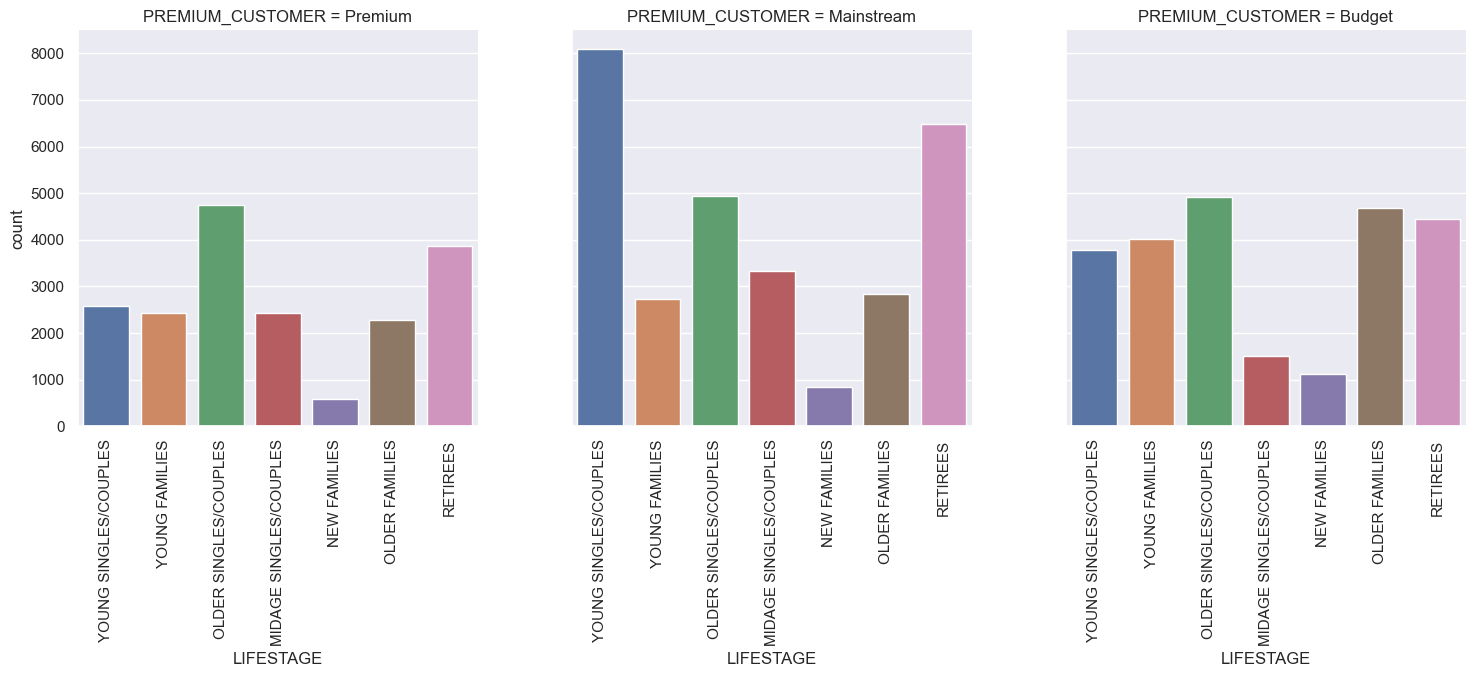

In [42]:

plt.figure(figsize=(25,5))
a = sns.catplot(x="LIFESTAGE", col="PREMIUM_CUSTOMER",
                data=data_p, kind="count")
a.set_xticklabels(rotation=90)

In [43]:
# Merge the 2 dataframes
data_new = data_t.merge(data_p, on='LYLTY_CARD_NBR', how='left')
data_new.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Pack-size           0
Brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [44]:
data_new.shape

(264834, 12)

In [45]:
data_new.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [48]:
with pd.ExcelWriter('quantium_clean.xlsx') as writer:
    # Write each dataframe to a different worksheet.
    data_new.to_excel(writer, sheet_name='Merged')


In [49]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE
sales = pd.DataFrame(data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            168363.25
Mainstream       YOUNG SINGLES/COUPLES     157621.60
                 RETIREES                  155677.05
Budget           YOUNG FAMILIES            139345.85
                 OLDER SINGLES/COUPLES     136769.80
Mainstream       OLDER SINGLES/COUPLES     133393.80
Premium          OLDER SINGLES/COUPLES     132263.15
Budget           RETIREES                  113147.80
Mainstream       OLDER FAMILIES            103445.55
Premium          RETIREES                   97646.05
Mainstream       YOUNG FAMILIES             92788.75
                 MIDAGE SINGLES/COUPLES     90803.85
Premium          YOUNG FAMILIES             84025.50
                 OLDER FAMILIES             80658.40
Budget           YOUNG SINGLES/COUPLES      61141.60
Premium          MIDAGE SINGLES/COUPLES     58432.65
                 YOUNG SINGLES/COUPLES      41642.10
Budget           MIDAGE SINGLES/COUPLES     35514.80
                 NEW FAMILIES               21928.45
Mainstream       NEW FAMILIES               17013.90
Premium          NEW FAMILIES               11491.10

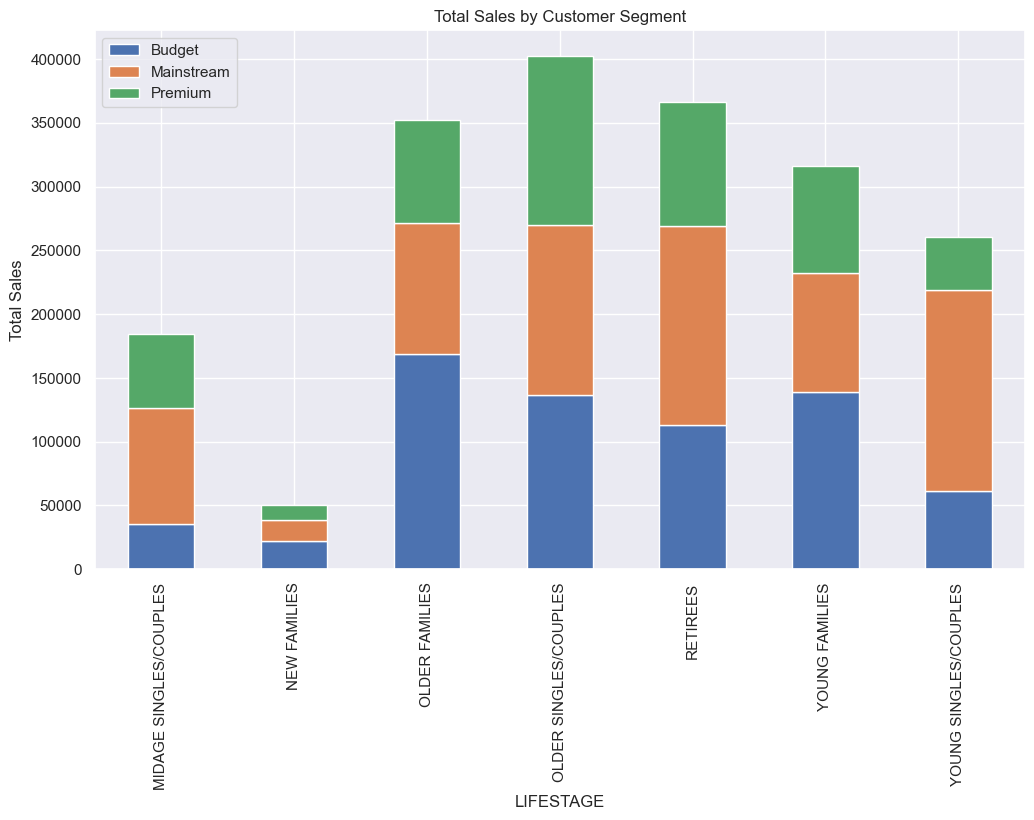

In [50]:

# Visualise
salesPlot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
     

In [51]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE
customers = pd.DataFrame(data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4675
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
Premium          RETIREES                              3872
Budget           YOUNG SINGLES/COUPLES                 3779

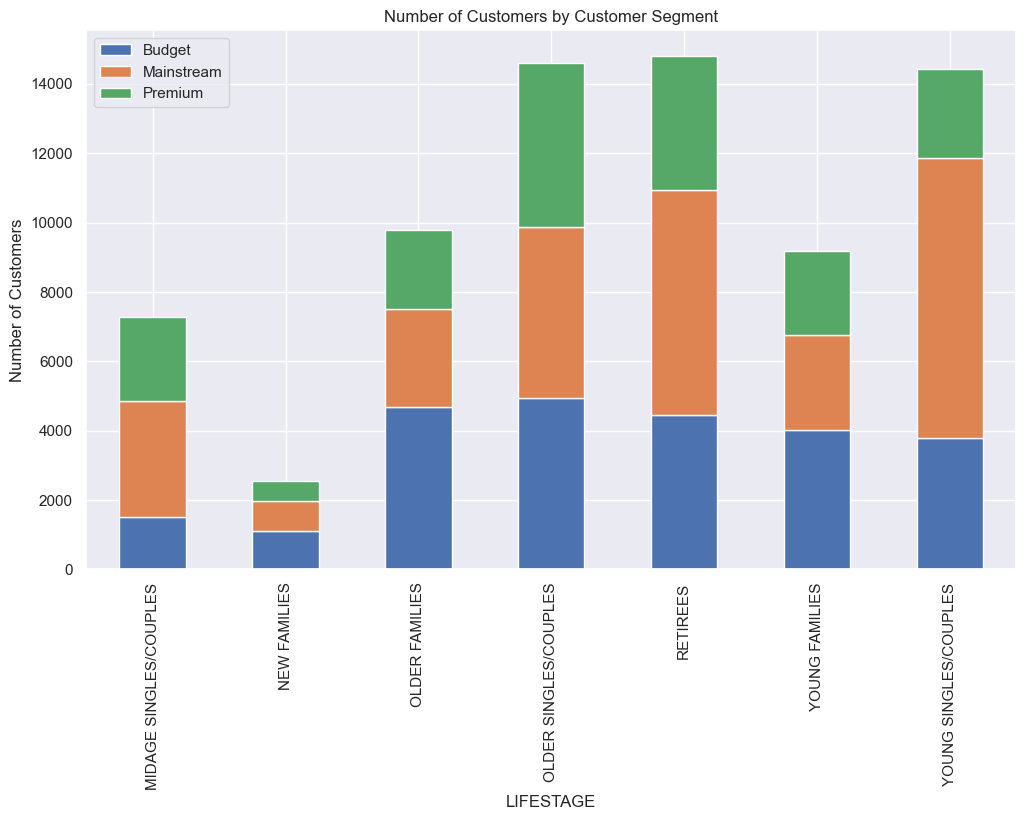

In [53]:
customersPlot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
     

In [55]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE
df_ppu = data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
df_ppu = pd.DataFrame(df_ppu, columns=['Average Unit per Customer'])
df_ppu.sort_values(by='Average Unit per Customer', ascending=False).head()


,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.804309
Budget,OLDER FAMILIES,9.639572
Premium,OLDER FAMILIES,9.578091
Budget,YOUNG FAMILIES,9.238486
Premium,YOUNG FAMILIES,9.209207


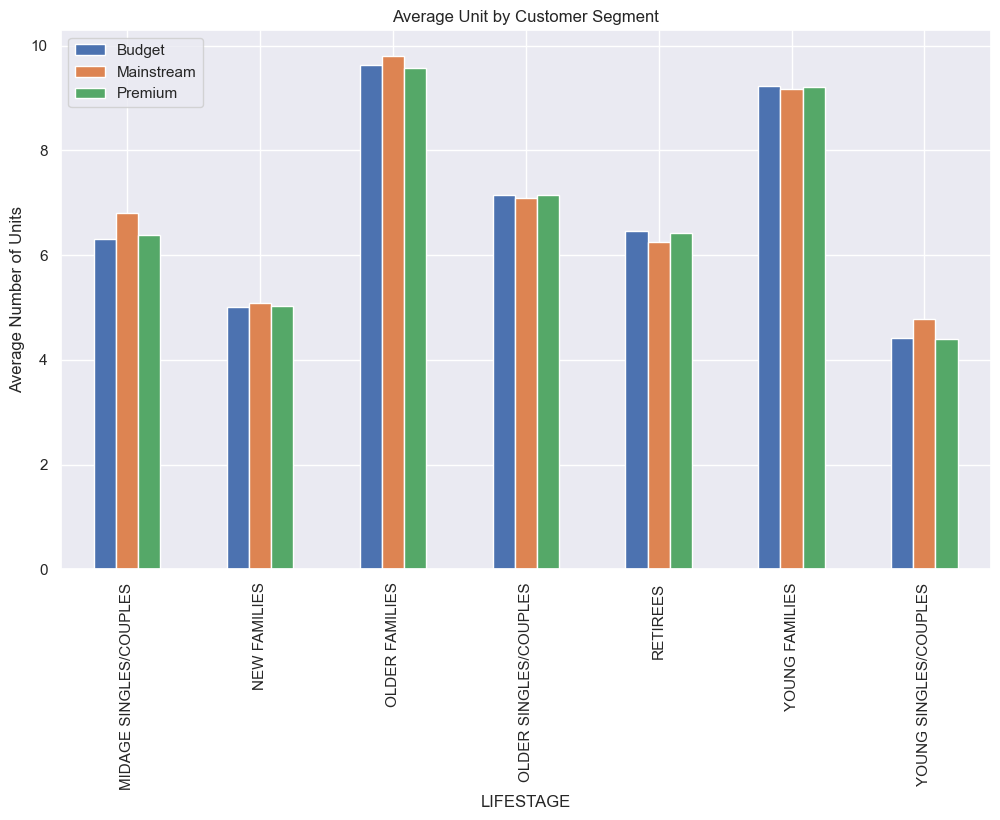

In [56]:
df_ppu_plot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
df_ppu_plot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
     

In [58]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE
avg_price = data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns=['Price per Unit'])
avg_price.sort_values(by='Price per Unit', ascending=False).head()


Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.080079
                 MIDAGE SINGLES/COUPLES        4.000346
                 NEW FAMILIES                  3.939315
Budget           NEW FAMILIES                  3.936178
                 RETIREES                      3.933660

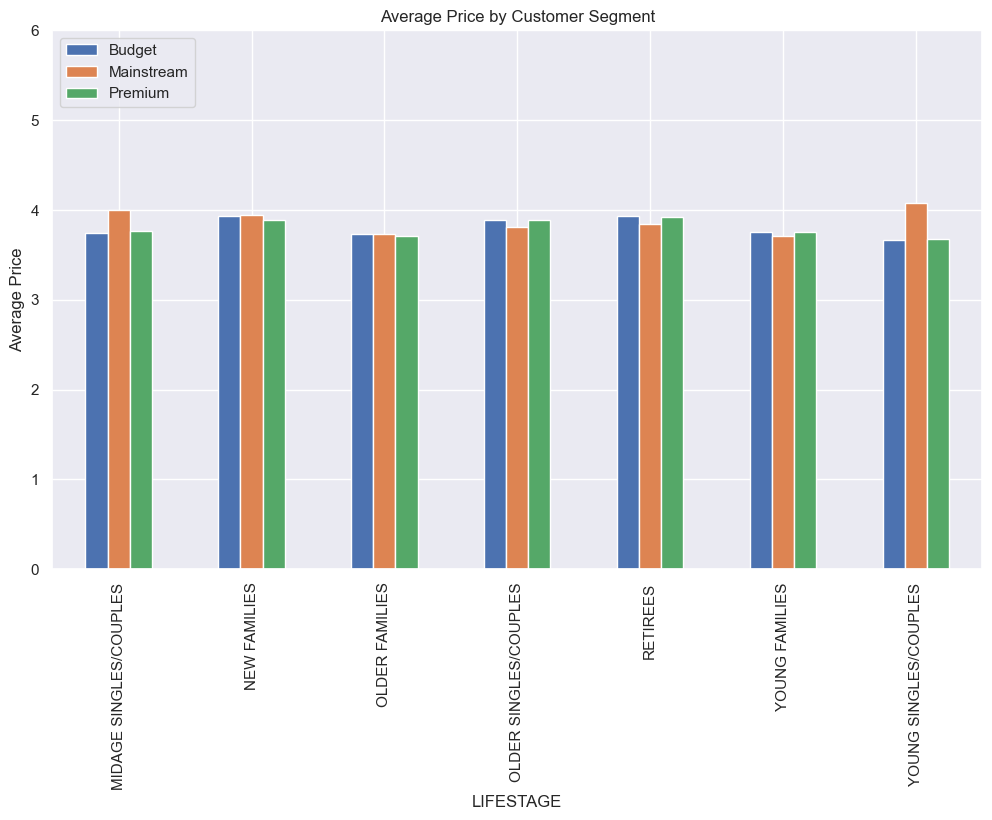

In [59]:
avg_price_plot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avg_price_plot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
     

In [60]:
# Create a new dataframe pricePerUnit
ppu = data_new

# Create a new column under pricePerUnit called PRICE
ppu['PRICE'] = ppu['TOT_SALES'] / ppu['PROD_QTY']

ppu.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [61]:
# Group the data into mainstream and others
mainstream = ppu.loc[(ppu['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
others = ppu.loc[(ppu['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
     

Text(0.5, 0, 'Price per Unit')

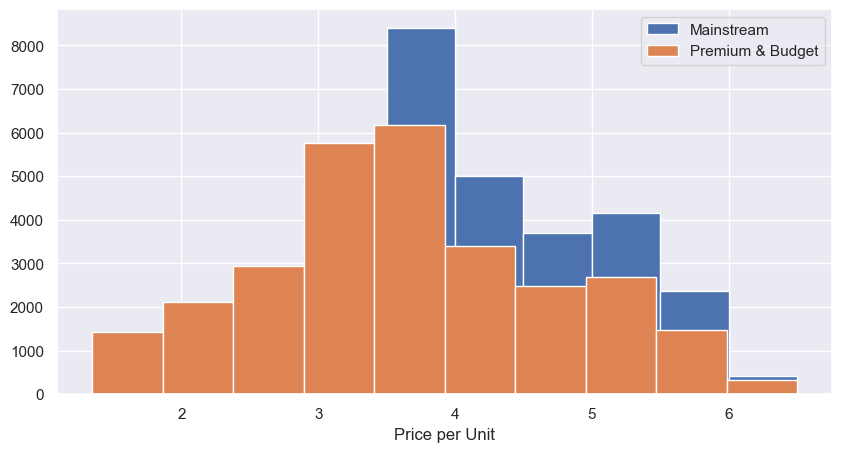

In [62]:
# Visualise
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(others, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [63]:
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(others)))
if np.mean(mainstream) > np.mean(others):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")
     


Mainstream average price per unit: $4.05
Non-mainstream average price per unit: $3.69
Mainstream customers have higher average price per unit. 


In [64]:
target = data_new.loc[(data_new['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data_new['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = data_new.loc[(data_new['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (data_new['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
237700,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
237701,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
237702,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200,Woolworths,YOUNG SINGLES/COUPLES,Mainstream,1.9
237703,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
237704,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [65]:
nonTarget.head()
     

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,Old,MIDAGE SINGLES/COUPLES,Budget,5.10


In [66]:
# Target Segment
targetBrand = target.loc[:, ['Brand', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('Brand')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['Brand', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('Brand')['Non-Target Brand Affinity'].sum())
     

# Merge the two dataframes together
brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
Brand,,
Burger,0.002744,0.006094
CCs,0.010484,0.017191
Cheetos,0.007533,0.010960
Cheezels,0.016851,0.017619
Cobs,0.041856,0.035836


In [67]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)
     

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
Brand,,,
Tyrrells,0.029587,0.023968,1.234454
Twisties,0.043306,0.035355,1.224877
Kettle,0.185649,0.155243,1.195863
Tostitos,0.042581,0.035744,1.191269
Old,0.041598,0.034931,1.190850
Pringles,0.111980,0.094240,1.188241
Cobs,0.041856,0.035836,1.167987
Doritos,0.122877,0.105278,1.167174
Infuzions,0.060649,0.053509,1.133443


In [68]:
# Target segment 
targetSize = target.loc[:, ['Pack-size', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('Pack-size')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['Pack-size', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('Pack-size')['Non-Target Pack Affinity'].sum())

# Merge the two dataframes together
pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
Pack-size,,
70,0.002847,0.005857
90,0.005954,0.011756
110,0.099658,0.083489
125,0.002821,0.005570
134,0.111980,0.094240


In [69]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)
     

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
Pack-size,,,
270,0.029846,0.023366,1.277295
380,0.030156,0.023964,1.258400
330,0.057465,0.047511,1.209522
110,0.099658,0.083489,1.193675
134,0.111980,0.094240,1.188241
210,0.027309,0.023200,1.177104
135,0.013849,0.012053,1.149001
250,0.013460,0.011989,1.122716
170,0.075740,0.074888,1.011386


In [70]:

# Find brands that offers 270g pack size
data_new.loc[data_new['Pack-size'] == 270, 'Brand'].unique()
     

array(['Twisties'], dtype=object)